In [19]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [79]:
#Importing data
df_10_06 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-06.txt",delimiter="|",header=None)
df_10_06.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_07 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-07.txt",delimiter="|",header=None)
df_10_07.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_11 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-11.txt",delimiter="|",header=None)
df_10_11.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_12 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-12.txt",delimiter="|",header=None)
df_10_12.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_15 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-15.txt",delimiter="|",header=None)
df_10_15.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_18 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-18.txt",delimiter="|",header=None)
df_10_18.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_22 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-22.txt",delimiter="|",header=None)
df_10_22.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_26 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-26.txt",delimiter="|",header=None)
df_10_26.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)
df_10_27 = pd.read_csv(r"C:/Users/Sam/Downloads/88888-10-27.txt",delimiter="|",header=None)
df_10_27.rename({0:"Time",3:"Bid Price",4:"Ask Price",5:"Transcation Price"},axis = 1, inplace = True)


In [80]:
#Storing the dataframe into a List
List_df = [df_10_06,df_10_07,df_10_11,df_10_12,df_10_15,df_10_18,df_10_22,df_10_26,df_10_27]

In [81]:
#Calculate the Bid_Ask_Spread
def Bid_Ask_Spread(df):
    Bid_Ask_Spread = []
    for i in range(len(df)):
        Bid_Ask_Spread.append(float(df["Ask Price"][i]) - float(df["Bid Price"][i]))
    df["Bid_Ask_Spread"] = Bid_Ask_Spread
    
    return df

In [82]:
#Calculate the Bid_Ask_Change
def Bid_Ask_Change(df):
    Bid_Price_Change = [0,0,0,0,0]
    Ask_Price_Change = [0,0,0,0,0]
    for i in range(5,len(df)):
        Bid_Price_Change.append(float(df["Bid Price"][i]) - float(df["Bid Price"][i-5]))
        Ask_Price_Change.append(float(df["Ask Price"][i]) - float(df["Ask Price"][i-5]))
    df["Bid_Price_Change"] = Bid_Price_Change
    df["Ask_Price_Change"] = Ask_Price_Change
    return df


In [83]:
# #Calculate the Bid_Ask_Flucation
# def Bid_Ask_Flucation(df,time):
#     Bid_Flucation = []
#     Ask_Flucation = []
#     Bid_Price = []
#     Ask_Price = []
#     for i in range(len(df)-time):
#         Bid_Flucation.append(float(df["Bid Price"][i+time]) - float(df["Bid Price"][i]))
#         Ask_Flucation.append(float(df["Ask Price"][i+time]) - float(df["Ask Price"][i]))
#         Bid_Price.append(float(df["Bid Price"][i+time]))
#         Ask_Price.append(float(df["Ask Price"][i+time]))
#     df["Bid_Flucation_After" + str(time)] = Bid_Flucation + [0]*time
#     df["Ask_Flucation_After" + str(time)] = Ask_Flucation + [0]*time
#     df["Bid_Price_After" + str(time)] = Bid_Price + [0]*time
#     df["Ask_Price_After" + str(time)] = Ask_Price + [0]*time
#     return df


In [84]:
#Covert to a unifed timestamp
def ConvertTime(Time):
    Time_df = []
    for i in Time:
        Hour = int(i[:2])
        Min = int(i[3:5])
        Sec = int(i[6:8])
        MSec = int(i[9:])
        Time_df.append(Hour*60*60*1000000+Min*60*1000000+Sec*1000000+MSec)
        
    Time_df = pd.DataFrame(Time_df)
    return Time_df

In [85]:
for i in List_df:
    Bid_Ask_Spread(i)
    Bid_Ask_Change(i)
    i.Time = ConvertTime(i.Time)

In [86]:
#Dropping Unused columns
for i in List_df:
    i.drop([1,2,6,7,8],axis = 1,inplace=True)

In [89]:
List_df[0]

,Time,Bid Price,Ask Price,Transcation Price,Bid_Ask_Spread,Bid_Price_Change,Ask_Price_Change
0,33240027397,0.0,24199.0,0.0,24199.0,0.0,0.0
1,33240029646,24180.0,24199.0,0.0,19.0,0.0,0.0
2,33300071139,24180.0,24210.0,24199.0,30.0,0.0,0.0
3,33300071161,24199.0,24210.0,0.0,11.0,0.0,0.0
4,33300118451,24199.0,24208.0,0.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...
220601,53880806927,23955.0,23957.0,0.0,2.0,0.0,1.0
220602,53881037657,23955.0,23958.0,0.0,3.0,0.0,1.0
220603,53881038185,23955.0,23957.0,0.0,2.0,0.0,-1.0
220604,53881620303,23955.0,23958.0,0.0,3.0,0.0,1.0


In [87]:
List_Bid_Change = []
List_Ask_Change = []


In [88]:
df_10_12

,Time,Bid Price,Ask Price,Transcation Price,Bid_Ask_Spread,Bid_Price_Change,Ask_Price_Change
0,33240030517,0.0,24897.0,0.0,24897.0,0.0,0.0
1,33240032904,24895.0,24897.0,0.0,2.0,0.0,0.0
2,33300075510,24895.0,24900.0,24897.0,5.0,0.0,0.0
3,33300075569,24897.0,24900.0,0.0,3.0,0.0,0.0
4,33300170844,24898.0,24900.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...
217918,53017997090,24848.0,24849.0,0.0,1.0,2.0,1.0
217919,53019047291,24847.0,24849.0,24848.0,2.0,0.0,1.0
217920,53019051418,24848.0,24849.0,0.0,1.0,1.0,0.0
217921,53019230498,24848.0,24850.0,0.0,2.0,0.0,1.0


In [93]:
#Extracting the index price after the bid-ask spread become large
def CreateDataFrame(df,Time):
    Timing = int(Time)
    for i in range(Timing-1000000,Timing+20000000,100000):
        if i == Timing-1000000:
            df_new = df.loc[df.Time<i+1].iloc[-1:,:]
            df_new.replace([df.loc[df.Time<i+1].iloc[-1:,:].Time],i+1000000-Timing,inplace=True)
        else:
            df_new = pd.concat([df_new,df.loc[df.Time<i+1].iloc[-1:,:]], axis = 0)
            df_new.replace([df.loc[df.Time<i+1].iloc[-1:,:].Time],i+1000000-Timing,inplace=True)
    return df_new



In [94]:
for dataframe in List_df:
    df_summary = dataframe.iloc[500:,:].loc[(dataframe.Bid_Ask_Spread>12)]
    i = 0
    while i<len(df_summary)-1:
        if df_summary.iloc[i:i+1,:].index[0] > df_summary.iloc[i+1:i+2,:].index[0] - 20:
            df_summary.drop(df_summary.iloc[i+1:i+2,:].index[0],inplace = True)
        else:
            i+=1
    for j in range(len(df_summary)):
        if abs(df_summary.iloc[j:j+1,:]["Bid_Price_Change"].item()) > abs(df_summary.iloc[j:j+1,:]["Ask_Price_Change"].item()):
            List_Bid_Change.append(CreateDataFrame(dataframe,df_summary.iloc[j:j+1,:].Time))
        else:
            List_Ask_Change.append(CreateDataFrame(dataframe,df_summary.iloc[j:j+1,:].Time))

In [107]:
List_Bid_Change[1]

,Time,Bid Price,Ask Price,Transcation Price,Bid_Ask_Spread,Bid_Price_Change,Ask_Price_Change
1981,-900000,24149.0,24152.0,24150.0,3.0,0.0,-1.0
1982,-800000,24150.0,24152.0,0.0,2.0,1.0,0.0
1982,-700000,24150.0,24152.0,0.0,2.0,1.0,0.0
1985,-600000,24149.0,24152.0,24150.0,3.0,0.0,2.0
1985,-500000,24149.0,24152.0,24150.0,3.0,0.0,2.0
...,...,...,...,...,...,...,...
2386,19600000,24124.0,24126.0,24125.0,2.0,2.0,2.0
2391,19700000,24126.0,24129.0,0.0,3.0,2.0,3.0
2391,19800000,24126.0,24129.0,0.0,3.0,2.0,3.0
2391,19900000,24126.0,24129.0,0.0,3.0,2.0,3.0


In [110]:
#Taking average for the index price
List_Bid = [0]*210
Sample = 0
for i in List_Bid_Change:
    if all(i["Bid Price"]  > 100):
        Sample += 1
        Count = 0
        for j in i["Bid Price"]:
            List_Bid[Count] += j
            Count += 1
            
for i in range(len(List_Bid)):
    List_Bid[i] /= Sample
List_Ask = [0]*210
Sample = 0
for i in List_Ask_Change:
    if all(i["Ask Price"]  > 100):
        Sample += 1
        Count = 0
        for j in i["Ask Price"]:
            List_Ask[Count] += j
            Count += 1
for i in range(len(List_Bid)):
    List_Ask[i] /= Sample


In [109]:
List_Ask = []

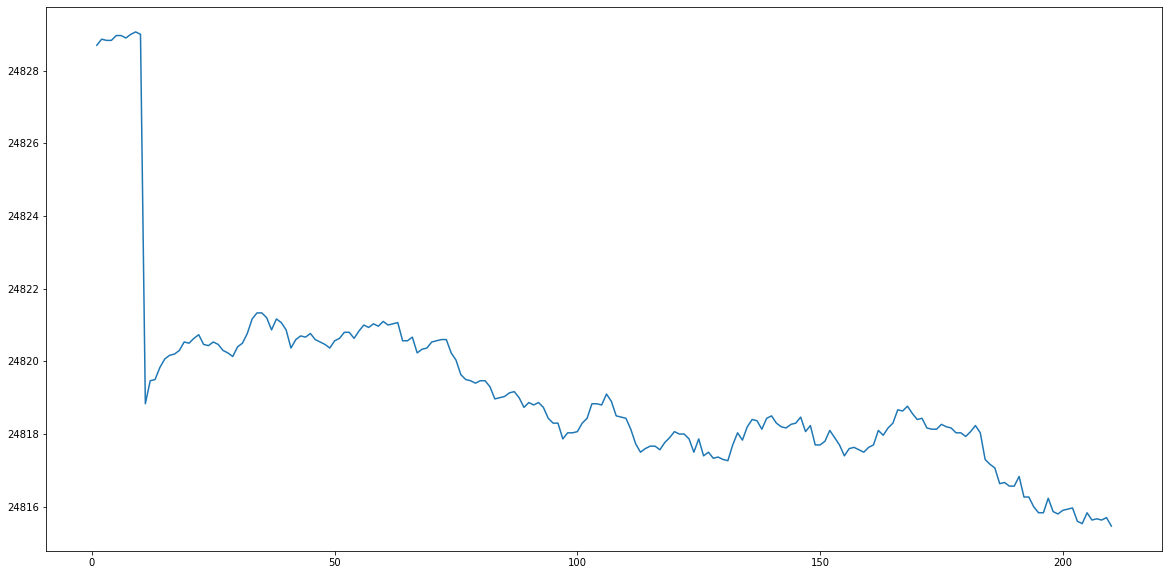

In [118]:
#Visualize the result
plt.rcParams["figure.figsize"] = (20,10)
x = np.arange(1,1+210)
plt.plot(x, List_Bid)

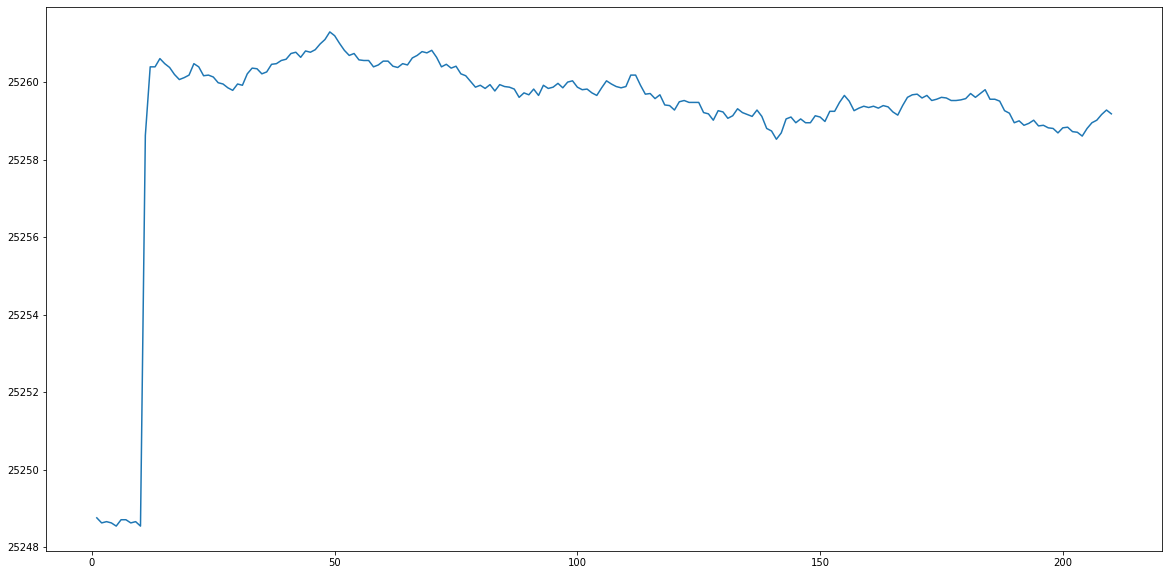

In [119]:
plt.plot(x, List_Ask)